<a href="https://colab.research.google.com/github/yixinzh-um/Earthquake_Damage_Prediction/blob/main/Earthquake_Damage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/Team 1 earthquake'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shared drives/Team 1 earthquake


In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df_train=pd.read_csv("train_values.csv")
df_train = pd.get_dummies(data=df_train, columns=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'])
df_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1020144,10,804,1371,2,5,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,199685,25,211,5071,2,25,9,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1038433,22,816,12104,2,10,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,461920,6,449,3741,1,10,8,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,957027,20,254,5266,2,10,10,6,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_train=df_train.dropna()
# df_train=df_train[df_train['age']<250]
df_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1020144,10,804,1371,2,5,7,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,199685,25,211,5071,2,25,9,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1038433,22,816,12104,2,10,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,461920,6,449,3741,1,10,8,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,957027,20,254,5266,2,10,10,6,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_damage=pd.read_csv("train_labels.csv")
df_damage.head()

,building_id,damage_grade
0,1020144,2
1,199685,2
2,1038433,2
3,461920,2
4,957027,3


In [ ]:
df_test=pd.read_csv("test_values.csv")
df_test = pd.get_dummies(data=df_test, columns=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'])
df_test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,221374,21,782,2972,2,0,10,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1042457,12,469,1685,2,0,9,4,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,529178,13,257,8318,3,40,8,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,398801,9,445,3469,1,10,14,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,932703,5,467,8530,2,25,9,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df= pd.merge(df_train,df_damage, on='building_id',how='left')
df.head()
len(df.columns.tolist())

70

In [ ]:
df_var=df_train.columns.to_frame().rename({0:'variable'},axis=1)
df_corr=df_var.copy()

In [ ]:
corr_lst=[]
for i in df_train.columns:
    corr, _ = pearsonr(df['damage_grade'], df[i])
    corr_lst.append(corr)
df_corr['corr']=corr_lst

In [ ]:
# corr_cla=df_corr[abs(df_corr['corr'])>0.005].index.tolist()

df_corr['a_corr']=df_corr['corr'].abs()
corr_cla=df_corr.sort_values('a_corr').index.tolist()[4:]
# corr_cla=df_corr.sort_values('a_corr').index.tolist()[4:]

print(
len(corr_cla),
    corr_cla
)

65 ['plan_configuration_n', 'position_o', 'ground_floor_type_x', 'plan_configuration_m', 'geo_level_3_id', 'plan_configuration_q', 'land_surface_condition_n', 'has_secondary_use_gov_office', 'has_secondary_use_health_post', 'plan_configuration_s', 'has_secondary_use_industry', 'has_secondary_use_school', 'has_secondary_use_agriculture', 'plan_configuration_o', 'has_superstructure_mud_mortar_brick', 'land_surface_condition_t', 'land_surface_condition_o', 'has_secondary_use_other', 'foundation_type_h', 'ground_floor_type_z', 'ground_floor_type_m', 'plan_configuration_a', 'plan_configuration_c', 'position_s', 'age', 'has_secondary_use_institution', 'legal_ownership_status_w', 'has_superstructure_other', 'position_j', 'other_floor_type_x', 'plan_configuration_d', 'geo_level_2_id', 'height_percentage', 'legal_ownership_status_v', 'position_t', 'has_superstructure_adobe_mud', 'count_families', 'has_superstructure_cement_mortar_stone', 'plan_configuration_u', 'has_superstructure_bamboo', 'has

In [ ]:

p_lst=[]
for i in df_train.columns:
    model0 = smf.ols(f"damage_grade ~ {i}", data=df).fit()
    p_lst.append(model0.pvalues[1])
df_p=df_var.copy()
df_p['p_value']=p_lst

In [ ]:
model0 = smf.ols(f"damage_grade ~ {'+'.join(df_train.columns)}", data=df).fit()

In [ ]:
df_p=model0.pvalues.reset_index().rename({0:'p_value','index':'variable'},axis=1)
# p_classifier=df_p[df_p['p_value']<0.05].variable.tolist()
p_classifier=df_p.variable.tolist()

print(
len(p_classifier),
p_classifier
)


70 ['Intercept', 'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other', 'land_surface_condition_n', 'land_surface_condition_o', 'land_surface_condition_t', 'foundation_type_h', 'foundat

In [ ]:
df_p=model0.pvalues.reset_index().rename({0:'p_value','index':'variable'},axis=1)
df_p_v=df_p.sort_values(by='p_value',ascending=False).variable.tolist()

In [ ]:
df_classifier=list(set(corr_cla)&set(p_classifier))
print(
len(df_classifier),
df_classifier
)

65 ['other_floor_type_s', 'plan_configuration_n', 'plan_configuration_q', 'legal_ownership_status_w', 'has_secondary_use_other', 'has_secondary_use_health_post', 'geo_level_1_id', 'has_superstructure_mud_mortar_stone', 'has_superstructure_timber', 'roof_type_x', 'foundation_type_i', 'has_secondary_use_gov_office', 'legal_ownership_status_a', 'geo_level_2_id', 'other_floor_type_x', 'ground_floor_type_v', 'foundation_type_u', 'has_superstructure_other', 'has_secondary_use_rental', 'has_secondary_use_agriculture', 'has_secondary_use', 'ground_floor_type_f', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'position_s', 'other_floor_type_q', 'plan_configuration_d', 'plan_configuration_o', 'position_o', 'has_superstructure_adobe_mud', 'has_secondary_use_school', 'has_secondary_use_institution', 'plan_configuration_u', 'has_secondary_use_industry', 'plan_configuration_a', 'ground_floor_type_m', 'foundation_type_r', 'ground_floor_type_x', 'land_surface_conditio

In [ ]:
df_p_c=df_p.set_index('variable')
df_p_c['c']=df_corr['a_corr']
df_p_c.dropna().sort_values('p_value',ascending=False)

,p_value,c
variable,,
plan_configuration_n,0.928437,0.003163
plan_configuration_m,0.830594,0.006913
geo_level_2_id,0.809087,0.044827
ground_floor_type_v,0.713277,0.319643
building_id,0.689051,0.000378
...,...,...
position_t,0.000000,0.052889
foundation_type_r,0.000000,0.343507
roof_type_n,0.000000,0.078110


In [ ]:
x=df_train[df_classifier]
y=df.loc[:,['damage_grade']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=.3, random_state=0)

# KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=140,p=1)
model=model.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, model.predict(X_test))


0.7087650294192889

(0.7061546622088631,)

In [ ]:
i_corr=10
lst=[]
for i in range(0,i_corr):
  corr_cla=df_corr.sort_values('a_corr').index.tolist()[i:]
  df_classifier=list(set(corr_cla)&set(p_classifier))
  x=df_train[df_classifier]
  y=df.loc[:,['damage_grade']]
  X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=.3, random_state=0)
  model=KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=140,p=1)
  model=model.fit(X_train, y_train.values.ravel())
  lst.append((i,accuracy_score(y_test, model.predict(X_test))))
  


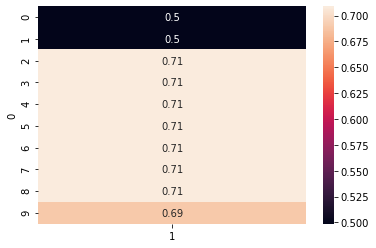

In [ ]:
sns.heatmap(pd.DataFrame(lst[:]).set_index(keys=0),annot=True)

In [ ]:
i_p=10
lst=[]
for i in range(0,i_p):
  corr_cla=df_corr.sort_values('a_corr').index.tolist()[:]
  p_classifier=df_p_v[i:]
  df_classifier=list(set(corr_cla)&set(p_classifier))
  x=df_train[df_classifier]
  y=df.loc[:,['damage_grade']]
  X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=.3, random_state=0)
  model=KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=140,p=1)
  model=model.fit(X_train, y_train.values.ravel())
  lst.append((i,accuracy_score(y_test, model.predict(X_test))))

In [ ]:
lst

[(0, 0.4986089792785879),
 (1, 0.4986089792785879),
 (2, 0.4986089792785879),
 (3, 0.4909183934510105),
 (4, 0.490774494755692),
 (5, 0.692168713225889),
 (6, 0.692168713225889),
 (7, 0.692168713225889),
 (8, 0.6922006907137376),
 (9, 0.6922006907137376)]

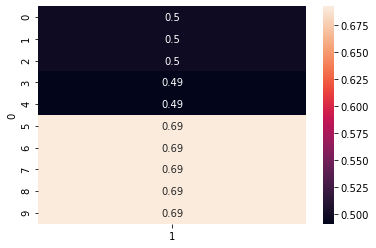

In [ ]:
sns.heatmap(pd.DataFrame(lst[:]).set_index(keys=0),annot=True)

In [ ]:
lst=[]
for i, j in itertools.product(range(4,7),[0,1,4]):
  corr_cla=df_corr.sort_values('a_corr').index.tolist()[i:]
  p_classifier=df_p_v[j:]
  df_classifier=list(set(corr_cla)&set(p_classifier))
  x=df_train[df_classifier]
  y=df.loc[:,['damage_grade']]
  X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=.3, random_state=0)
  model=KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=140,p=1)
  model=model.fit(X_train, y_train.values.ravel())
  lst.append((i,j,accuracy_score(y_test, model.predict(X_test))))

In [ ]:
# sns.heatmap(pd.DataFrame([((i[0],i[1]),i[2]) for i in lst][0,1,3,4,6,7]).set_index([0]),annot=True)
[((i[0],i[1]),i[2]) for i in lst][0:]

[((4, 0), 0.7087650294192889),
 ((4, 1), 0.7087650294192889),
 ((4, 4), 0.6920727807623434),
 ((5, 0), 0.7087650294192889),
 ((5, 1), 0.7087650294192889),
 ((5, 4), 0.6920727807623434),
 ((6, 0), 0.7087970069071374),
 ((6, 1), 0.7087970069071374),
 ((6, 4), 0.691992837042722)]

In [ ]:
df_corr.sort_values(['a_corr'])[6:]

,variable,corr,a_corr
ground_floor_type_x,ground_floor_type_x,0.006831,0.006831
plan_configuration_m,plan_configuration_m,-0.006913,0.006913
geo_level_3_id,geo_level_3_id,0.007659,0.007659
plan_configuration_q,plan_configuration_q,0.007675,0.007675
land_surface_condition_n,land_surface_condition_n,0.008215,0.008215
...,...,...,...
foundation_type_i,foundation_type_i,-0.265263,0.265263
roof_type_x,roof_type_x,-0.279889,0.279889
has_superstructure_mud_mortar_stone,has_superstructure_mud_mortar_stone,0.291855,0.291855
ground_floor_type_v,ground_floor_type_v,-0.319643,0.319643


In [ ]:
df_corr.sort_values(['a_corr'])[6:].index

Index(['ground_floor_type_x', 'plan_configuration_m', 'geo_level_3_id',
       'plan_configuration_q', 'land_surface_condition_n',
       'has_secondary_use_gov_office', 'has_secondary_use_health_post',
       'plan_configuration_s', 'has_secondary_use_industry',
       'has_secondary_use_school', 'has_secondary_use_agriculture',
       'plan_configuration_o', 'has_superstructure_mud_mortar_brick',
       'land_surface_condition_t', 'land_surface_condition_o',
       'has_secondary_use_other', 'foundation_type_h', 'ground_floor_type_z',
       'ground_floor_type_m', 'plan_configuration_a', 'plan_configuration_c',
       'position_s', 'age', 'has_secondary_use_institution',
       'legal_ownership_status_w', 'has_superstructure_other', 'position_j',
       'other_floor_type_x', 'plan_configuration_d', 'geo_level_2_id',
       'height_percentage', 'legal_ownership_status_v', 'position_t',
       'has_superstructure_adobe_mud', 'count_families',
       'has_superstructure_cement_mortar_st

2 (0.7060742931541639,)

In [ ]:
corr_cla=df_corr.sort_values('a_corr').index.tolist()[6:]
df_classifier=list(set(corr_cla)&set(p_classifier))
x=df_train[df_classifier]
y=df.loc[:,['damage_grade']]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=.3, random_state=0)
model=KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=140,p=1)
model=model.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, model.predict(X_test))

0.691992837042722

In [ ]:
k_df=pd.DataFrame(range(1,20),columns=['n_neighbours'])
k_lst=[]
for i in range(1,20):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train.values.ravel())
  k_lst.append(accuracy_score(y_test, model.predict(X_test)))
k_df['score']=k_lst
k_df

,n_neighbours,score
0,1,0.637967
1,2,0.641980
2,3,0.647704
3,4,0.658161
4,5,0.660623
5,6,0.662350
6,7,0.661071
7,8,0.661486
8,9,0.659104
9,10,0.659280


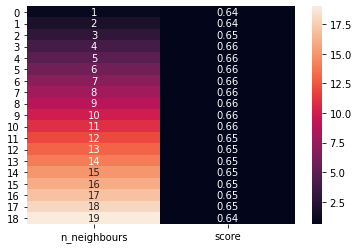

In [ ]:
# k_df=k_df.set_index(keys='n_neighbours')
k_df
sns.heatmap(k_df,annot=True)

In [ ]:
k_lst=[]
for i in ['uniform','distance']:
  model = KNeighborsClassifier(n_neighbors=6,weights=i)
  model.fit(X_train, y_train.values.ravel())
  k_lst.append(accuracy_score(y_test, model.predict(X_test)))
k_lst

[0.6623497058071118, 0.6677698899974418]

In [ ]:
k_lst=[]
for i in ['auto','ball_tree','kd_tree','brute']:
  model = KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm=i)
  model.fit(X_train, y_train.values.ravel())
  k_lst.append(accuracy_score(y_test, model.predict(X_test)))
k_lst

[0.6677698899974418,
 0.6672422614479406,
 0.6677698899974418,
 0.6667945766180609]

In [ ]:
k_lst=[]
for i in range(1,50,5):
  model = KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=i)
  model.fit(X_train, y_train.values.ravel())
  k_lst.append(accuracy_score(y_test, model.predict(X_test)))
k_lst

[0.6673541826554106,
 0.6673701713993349,
 0.6675460475825019,
 0.6675460475825019,
 0.6672422614479406,
 0.6672422614479406,
 0.6672422614479406,
 0.6670823740086979,
 0.6670823740086979,
 0.6670823740086979]

In [ ]:
k_lst=[]
for i in range(80,146,5):
  model = KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=i)
  model.fit(X_train, y_train.values.ravel())
  k_lst.append(accuracy_score(y_test, model.predict(X_test)))
k_lst

[0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672582501918649,
 0.6672902276797135]

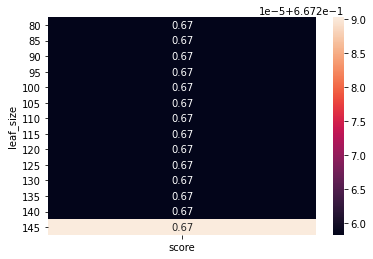

In [ ]:
k_df=pd.DataFrame(range(80,146,5),columns=['leaf_size'])
k_df['score']=k_lst
k_df=k_df.set_index('leaf_size')
sns.heatmap(k_df,annot=True)

In [ ]:
k_df.sort_values(by='score',ascending=False)

,score
leaf_size,
145,0.667290
80,0.667258
85,0.667258
90,0.667258
95,0.667258
100,0.667258
105,0.667258
110,0.667258
115,0.667258


In [ ]:
k_lst=[]
for i in [1,2,3]:
  model = KNeighborsClassifier(n_neighbors=6,weights='distance',algorithm='ball_tree',leaf_size=80,p=i)
  model.fit(X_train, y_train.values.ravel())
  k_lst.append(accuracy_score(y_test, model.predict(X_test)))
k_lst

[0.691992837042722, 0.6672582501918649, 0.6575051163980558]

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(60,151,20))
n_neighbors = [6]
p=[1]
algorithm=['ball_tree']
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,algorithm=algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train.values.ravel())
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 60
Best p: 1
Best n_neighbors: 6


In [ ]:
print(
accuracy_score(y_test, best_model.predict(X_test)),
# recall_score(y_test, model.predict(X_test),average='micro'),
# precision_score(y_test, model.predict(X_test),average='micro')
)

0.6937036326426196


In [ ]:
model = KNeighborsClassifier(n_neighbors=6,weights='distance',leaf_size=80,p=1)

In [ ]:
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='distance')

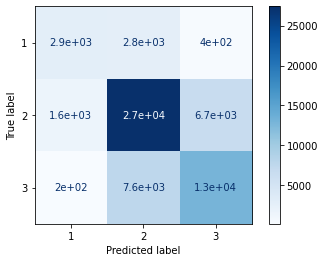

In [ ]:


# confusion matrix shows the all results by how they were classified
plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [ ]:
print(
accuracy_score(y_test, model.predict(X_test)),
# recall_score(y_test, model.predict(X_test),average='micro'),
# precision_score(y_test, model.predict(X_test),average='micro')
)

0.6918169608595549


| accuracy score      | p     | corr   | kaggle  |
|---------------------|-------|--------|---------|
| 0.45019529680291903 | 0.05  |        |         |
| 0.45019529680291903 | 0.1   |        |         |
| 0.45021137061385885 | 0.5   |        |         |
| 0.6485621976114317  | 0     | >0     |         |
| 0.6485621976114317  | 0.001 | >0.001 |         |
| 0.6486104190442512  | 0.05  | >0.005 |         |
| 0.6485621976114317  | <0.05 | [1:]   |         |
| 0.6485782714223716  | <0.05 | [5:]   |         |
| 0.648530049989552   | <0.05 | [7:]   |         |
| 0.6486104190442512  | <0.05 | [6:]   | 0.63919 |

# Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, clf.predict(X_test))

0.6354086722947045

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     df_train, df.loc[:,['damage_grade']], test_size=.3, random_state=0)

In [ ]:
#List Hyperparameters that we want to tune.
# max_depth=list(range(15,201,20))
min_samples_split=np.arange(0.00108,0.00112, 0.00001)
# min_samples_split=[0.0011]
min_samples_leaf=np.arange(0.00008,0.00012,0.00001)
# min_samples_leaf=[0.0001]
max_features = list(range(1,df_train.shape[1]))
#Convert to dictionary
hyperparameters = dict(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
#Create new DecisionTree object
clf = tree.DecisionTreeClassifier()
#Use GridSearch
clf = GridSearchCV(clf, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train.values.ravel())
#Print The value of best Hyperparameters
print('Best max_depth', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split', best_model.best_estimator_.get_params()['min_samples_split']) 
print('Best min_samples_leaf', best_model.best_estimator_.get_params()['min_samples_leaf']) 

Best max_depth None
Best min_samples_split 0.00109
Best min_samples_leaf 0.00011


In [ ]:
accuracy_score(y_test, best_model.predict(X_test))

0.7133697876694807

In [ ]:
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, model.predict(X_test))

0.6448740086978767

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=15,min_samples_split=0.0011,min_samples_leaf=0.0001)
model = clf.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, model.predict(X_test))

0.705199539524175

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split=0.0011,min_samples_leaf=0.0001)
model1 = clf.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, model1.predict(X_test))

0.7130500127909951

In [ ]:
clf = tree.DecisionTreeClassifier(min_samples_split=0.0011,min_samples_leaf=0.0001)
model2 = clf.fit(X_train, y_train.values.ravel())
accuracy_score(y_test, model2.predict(X_test))

0.7129380915835252

# Output

In [ ]:
df_test

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,221374,21,782,2972,2,0,10,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1042457,12,469,1685,2,0,9,4,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,529178,13,257,8318,3,40,8,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,398801,9,445,3469,1,10,14,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,932703,5,467,8530,2,25,9,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52116,239615,7,108,10202,1,0,2,3,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
52117,485419,15,192,90,2,5,11,5,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
52118,1031181,26,886,11562,2,15,5,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
52119,548327,18,639,9213,2,10,8,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_pred = model2.predict(df_test)

In [ ]:
y_pred

array([3, 3, 2, ..., 2, 3, 2])

In [ ]:
predictions_pd = pd.concat([df_test['building_id'], pd.DataFrame(y_pred)], axis=1)
predictions_pd = predictions_pd.rename(columns={0: "damage_grade"})
predictions_pd.to_csv('predictions.csv', index=False, float_format='%.f')
# files.download("predictions.csv")
predictions_pd 

,building_id,damage_grade
0,221374,3
1,1042457,3
2,529178,2
3,398801,2
4,932703,2
...,...,...
52116,239615,2
52117,485419,2
52118,1031181,2
52119,548327,3


| accuracy score      | p     | corr   | kaggle  |
|---------------------|-------|--------|---------|
| 0.45019529680291903 | 0.05  |        |         |
| 0.45019529680291903 | 0.1   |        |         |
| 0.45021137061385885 | 0.5   |        |         |
| 0.6485621976114317  | 0     | >0     |         |
| 0.6485621976114317  | 0.001 | >0.001 |         |
| 0.6486104190442512  | 0.05  | >0.005 |         |
| 0.6485621976114317  | <0.05 | [1:]   |         |
| 0.6485782714223716  | <0.05 | [5:]   |         |
| 0.648530049989552   | <0.05 | [7:]   |         |
| 0.6486104190442512  | <0.05 | [6:]   | 0.63919 |